In [1]:
from IPython.display import Image

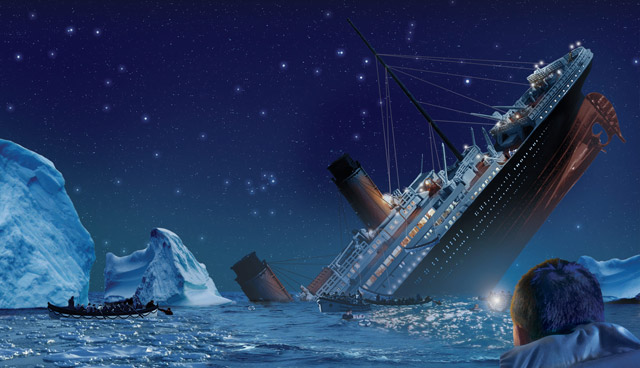

In [2]:
Image(filename='images/titanic-disaster.jpg')

### predict who people survived from titanic
use binary classification<br>

<a href='https://kaggle.com/c/titanic' target="_blank">https://kaggle.com/c/titanic</a>

### import Toolkits(Libs)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### import dataset

In [4]:
train=pd.read_csv("data/train.csv")

In [5]:
test=pd.read_csv("data/test.csv")

In [6]:
y_value=pd.read_csv("data/gender_submission.csv")

### preprocessing data

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
y_value.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
train.describe().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [16]:
train.shape

(891, 12)

### data cleaning

In [18]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

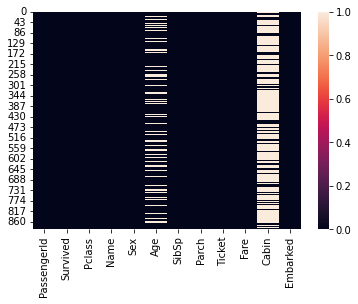

In [19]:
sns.heatmap(train.isnull())

In [22]:
train['Age'].fillna(train['Age'].median(),inplace=True)

<AxesSubplot:>

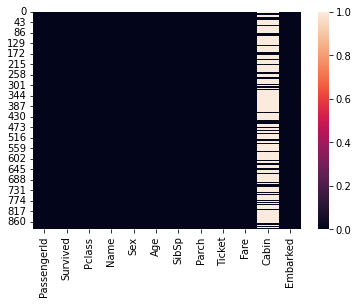

In [23]:
sns.heatmap(train.isna())

drop not important columns

In [25]:
train.drop(['PassengerId','Cabin'],axis=1,inplace=True)

In [28]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [27]:
train.drop(['Ticket'],axis=1,inplace=True)

In [31]:
train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [30]:
train['Embarked'].fillna('S',inplace=True)

In [40]:
train.drop(['Name'],axis=1,inplace=True)

In [42]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
le=LabelEncoder()
label=le.fit_transform(train['Embarked'])
train['Embarked']=label

In [45]:
le=LabelEncoder()
label=le.fit_transform(train['Sex'])
train['Sex']=label

### EDA exploratory data anlysis

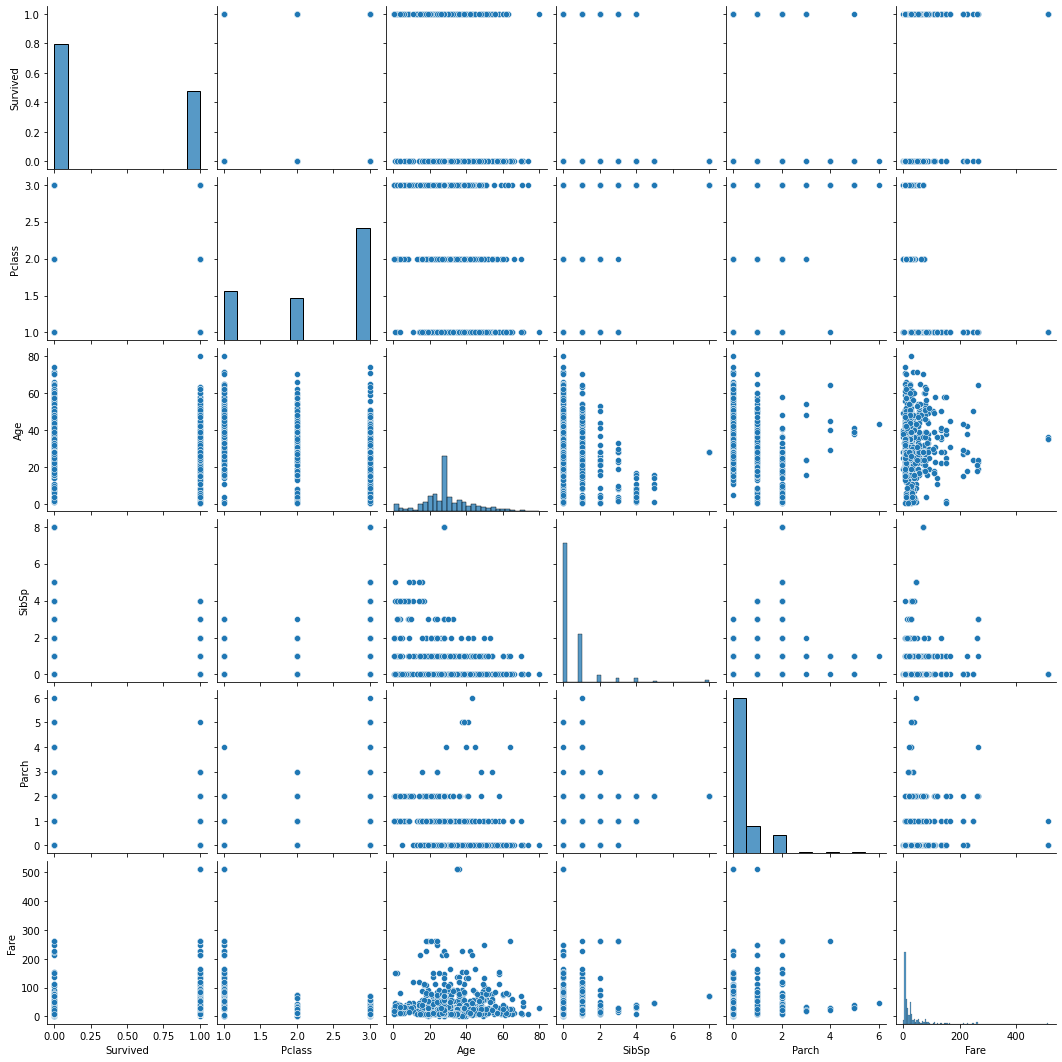

In [32]:
sns.pairplot(data=train)

<AxesSubplot:>

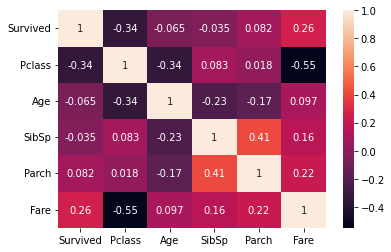

In [33]:
sns.heatmap(train.corr(),annot=True)

<AxesSubplot:xlabel='Survived', ylabel='count'>

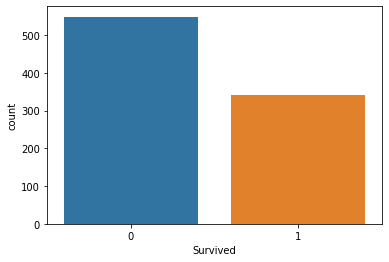

In [34]:
sns.countplot(x='Survived',data=train)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

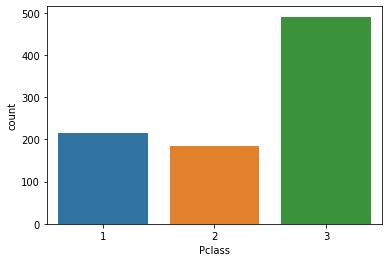

In [35]:
sns.countplot(x='Pclass',data=train)

<AxesSubplot:>

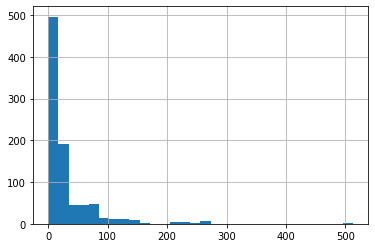

In [36]:
train['Fare'].hist(bins=30)

<AxesSubplot:>

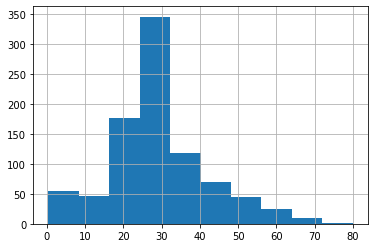

In [37]:
train['Age'].hist()

<AxesSubplot:xlabel='SibSp', ylabel='count'>

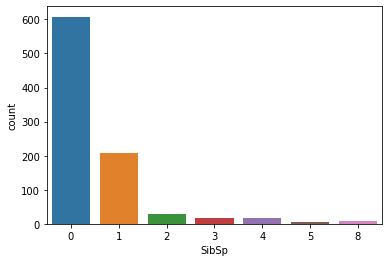

In [38]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot:xlabel='Parch', ylabel='count'>

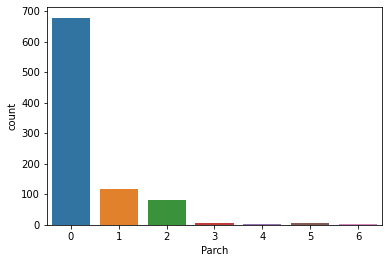

In [39]:
sns.countplot(x='Parch',data=train)

<AxesSubplot:xlabel='Sex', ylabel='count'>

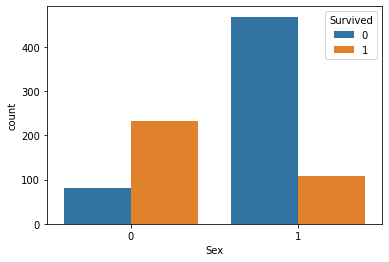

In [54]:
sns.countplot(x='Sex',hue='Survived',data=train)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

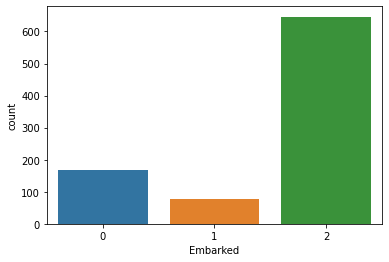

In [56]:
sns.countplot(x='Embarked',data=train)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

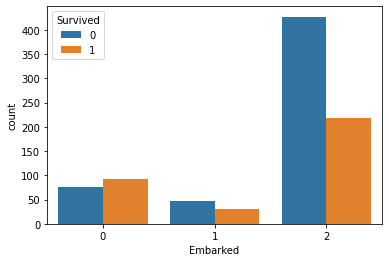

In [58]:
sns.countplot(x='Embarked',hue='Survived',data=train)

## Building Models

### splitting data

In [61]:
X=train.iloc[:,1:]
y=train.iloc[:,0]

In [62]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [59]:
from sklearn.model_selection import train_test_split

In [65]:
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.80)

### training data

logisitic regression

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
model_lr=LogisticRegression(max_iter=1000)
model_lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [68]:
model_lr.score(x_train,y_train)

0.7963483146067416

In [69]:
model_lr.score(x_test,y_test)

0.8100558659217877

svm (support vector machine)

In [70]:
from sklearn.svm import SVC

In [74]:
model_svm=SVC(kernel='linear',C=1)
model_svm.fit(x_train,y_train)

SVC(C=1, kernel='linear')

In [75]:
model_svm.score(x_train,y_train)

0.7823033707865169

In [76]:
model_svm.score(x_test,y_test)

0.8044692737430168

### testing data

In [85]:
model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [86]:
model.score(x_train,y_train)

0.7963483146067416

In [87]:
model.score(x_test,y_test)

0.8100558659217877

### evolution model

In [88]:
y_predict=model.predict(x_test)

In [89]:
y_predict

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0], dtype=int64)

In [90]:
y_test.values

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [91]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [96]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [94]:
test.drop(['Cabin','Name'],axis=1,inplace=True)

In [95]:
test['Age'].fillna(test['Age'].median(),inplace=True)
test['Fare'].fillna(test['Fare'].median(),inplace=True)

In [97]:
test2=test.drop(['PassengerId'],axis=1).copy()

In [98]:
test2.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,male,34.5,0,0,330911,7.8292,Q
1,3,female,47.0,1,0,363272,7.0000,S
2,2,male,62.0,0,0,240276,9.6875,Q
3,3,male,27.0,0,0,315154,8.6625,S
4,3,female,22.0,1,1,3101298,12.2875,S


In [99]:
le=LabelEncoder()
label=le.fit_transform(test2['Embarked'])
test2['Embarked']=label

In [100]:
le=LabelEncoder()
label=le.fit_transform(test2['Sex'])
test2['Sex']=label

In [103]:
test2.drop(['Ticket'],axis=1,inplace=True)

In [104]:
test2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [109]:
y_test=model.predict(test2)

In [110]:
df=pd.DataFrame({
    'PassengerId':test['PassengerId'],
    'Survived':y_test
})

In [111]:
df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [112]:
df.to_csv('data/submit.csv')

In [115]:
df1=pd.read_csv('data/gender_submission.csv')
df2=pd.read_csv('data/submit.csv')

In [116]:
df1.shape,df2.shape

((418, 2), (418, 2))

In [126]:
print(f'accuracy for submission {((df1.iloc[:,1]==df2.iloc[:,1]).sum()/df1.shape[0])*100}')

accuracy for submission 93.30143540669856
